In [5]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

print(X)

[[ 1  2]
 [ 1  4]
 [ 1  0]
 [10  2]
 [10  4]
 [10  0]]


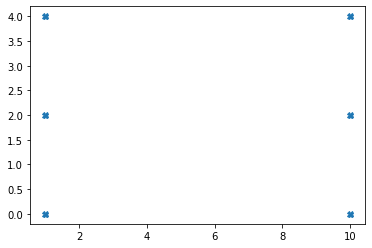

In [12]:
plt.plot(X[:,0],X[:,1],'X')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)


In [9]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

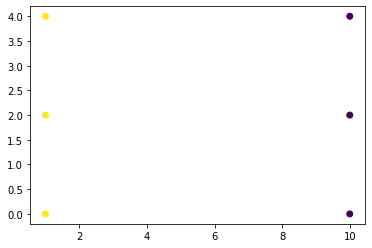

In [13]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.show()

In [30]:
u = kmeans.predict([[0, 0], [12, 3]])
print(u)
print(u[1])

[1 0]
0


[[ 0  0]
 [12  3]]


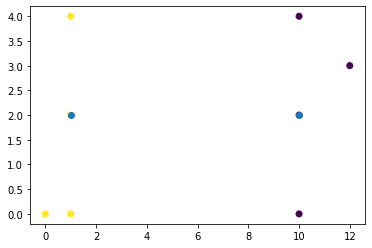

In [36]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
predict_value = np.array([[0,0],[12,3]])
print(predict_value)
plt.scatter(predict_value[:,0],predict_value[:,1],c=u)
cen = kmeans.cluster_centers_

plt.scatter(cen[:,0],cen[:,1])

In [37]:
print(kmeans.inertia_)

16.0


In [38]:
print(kmeans.labels_)

[1 1 1 0 0 0]


In [46]:
for cluster in np.arange(8):
    # print(cluster)
    print('---')
    print(X[kmeans.labels_==cluster, 0],X[kmeans.labels_==cluster, 1])
    print('---')
    # plt.plot(X[kmeans.labels_==cluster, 0], X[kmeans.labels_==cluster, 1], 'x')

---
[10 10 10] [2 4 0]
---
---
[1 1 1] [2 4 0]
---
---
[] []
---
---
[] []
---
---
[] []
---
---
[] []
---
---
[] []
---
---
[] []
---


In [44]:
print(X)

[[ 1  2]
 [ 1  4]
 [ 1  0]
 [10  2]
 [10  4]
 [10  0]]


In [47]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [48]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

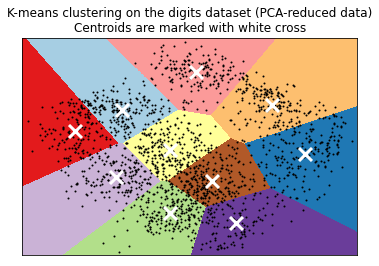

In [51]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [55]:
print(data)
print(data.shape)
print(labels.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
(1797,)


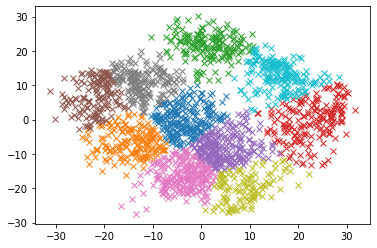

In [57]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

plt.figure()
for cluster in np.arange(n_digits):
    plt.plot(reduced_data[kmeans.labels_==cluster, 0], reduced_data[kmeans.labels_==cluster, 1], 'x')
    plt.legend([])


plt.show()



In [19]:
from scipy.stats import norm, multivariate_normal
from scipy.special import logsumexp

In [20]:
x = np.linspace(1, 10, 500)
y = np.linspace(5, 50, 500)
X, Y = np.meshgrid(x, y)

In [21]:
print(x.shape)
print(Y.shape)

(500,)
(500, 500)


In [22]:
pos = np.array([X.flatten(), Y.flatten()]).T
pos

array([[ 1.        ,  5.        ],
       [ 1.01803607,  5.        ],
       [ 1.03607214,  5.        ],
       ...,
       [ 9.96392786, 50.        ],
       [ 9.98196393, 50.        ],
       [10.        , 50.        ]])

In [23]:
mu = np.random.randn(3, 2)
mu

array([[-0.56699925,  0.18701133],
       [ 0.78074855,  1.88662142],
       [-0.20907821,  2.37807185]])

In [24]:
rv = multivariate_normal([-0.73831014, -0.48510724], 5)

In [25]:
pdf = rv.pdf(pos).reshape(500, 500)

In [26]:
pdfs = np.array(pdf)

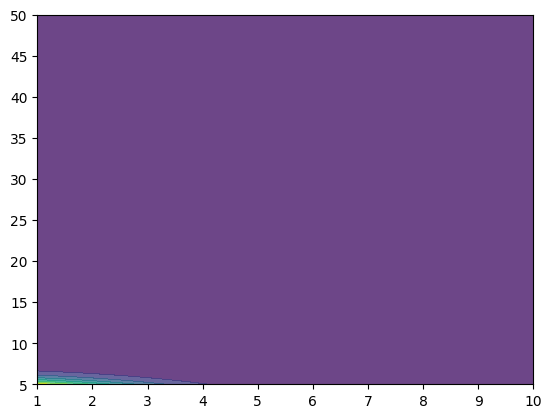

In [27]:
plt.contourf(X, Y,pdfs, alpha=0.8)

In [55]:
import numpy as np

A = np.array([[1,2,3],[4,5,6]])
print(A)

print(A.shape[1])
print(A[:,2])

[[1 2 3]
 [4 5 6]]
3
[3 6]


In [12]:
print(np.eye(3))
print(np.identity(3))
print(np.zeros((1,0)))
C = np.array([[1,0]]) 
print(C.shape)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[]
(1, 2)


In [56]:
for i in range(0,7):
    print(i)

0
1
2
3
4
5
6


In [7]:
np.random.seed(445) ; np.random.rand(4)

array([0.64326146, 0.06564589, 0.00722709, 0.30073481])

In [10]:
np.random.seed(445) ; np.random.rand(4)

array([0.64326146, 0.06564589, 0.00722709, 0.30073481])

In [41]:
from sklearn.datasets import fetch_openml
def get_data():
    """Load penguins data from Github."""
    penguins = fetch_openml("penguins", as_frame=False)
    # get 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
    # 'body_mass_g' features
    X = penguins["data"][:, 1:5]
    # drop NA values
    X = X[~np.isnan(X).any(axis=1)]
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    print(f"Shape of the input data: {X.shape[0]} by {X.shape[1]}")
    return X

In [42]:
np.random.seed(445)
X = get_data()

Shape of the input data: 342 by 4


In [43]:
print(X)

[[-0.88449874  0.78544923 -1.41834665 -0.56414208]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305]
 [-0.66437972  0.43046236 -0.42127665 -1.18853234]
 ...
 [ 1.18828874 -0.73592307  1.50164406  1.93341896]
 [ 0.23443963 -1.19233476  0.7894512   1.24658968]
 [ 1.09657248 -0.53307343  0.86067049  1.49634578]]


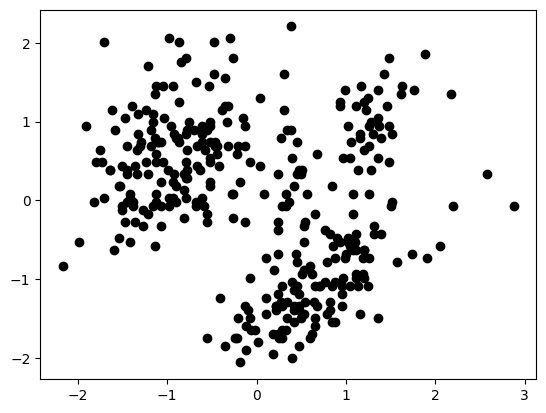

In [44]:
xVals = X[:, 0]
yVals = X[:, 1]
plt.scatter(xVals, yVals, color="black")
plt.show()

In [49]:
num_K = range(2, 9) 
# print(num_K)
for idx in range(len(num_K)):
    # Running
    # print(idx)
    k = num_K[idx]
    print("k = " +str(k) + " idx = " +str(idx))
    # print("%d clusters..." % k)

k = 2 idx = 0
k = 3 idx = 1
k = 4 idx = 2
k = 5 idx = 3
k = 6 idx = 4
k = 7 idx = 5
k = 8 idx = 6


In [60]:
N = X.shape[0]
D = X.shape[1]
print(N)
print(D)

342
4


In [66]:
K = 3
N = X.shape[0]
D = X.shape[1]
pk = np.ones((K, 1)) / K  # Uniformly initialize cluster proportions
mu = np.random.randn(K, D)  # Random initialization of clusters
zk = np.zeros([N, K])

print(mu)
print(zk.shape)

[[ 0.95486881 -1.13625616 -0.19583476 -0.10312424]
 [ 0.93496451  0.49065487  0.39988197 -0.96307667]
 [-0.41196464  0.80044569 -1.43506234  1.09740613]]
(342, 3)


In [67]:
def gmm(trainX, num_K, num_iter=10, plot=False):
    """Fit a gaussian mixture model on trainX data with num_K clusters.

    trainX is a NxD matrix containing N datapoints, each with D features
    num_K is the number of clusters or mixture components
    num_iter is the maximum number of EM iterations run over the dataset

    Description of other variables:
        - mu, which is KxD, the coordinates of the means
        - pk, which is Kx1 and represents the cluster proportions
        - zk, which is NxK, has at each z(n,k) the probability that the nth
          data point belongs to cluster k, specifying the cluster associated
          with each data point
        - si2 is the estimated (shared) variance of the data
        - BIC is the Bayesian Information Criterion (smaller BIC is better)
    """
    N = trainX.shape[0]
    D = trainX.shape[1]

    if num_K >= N:
        print("You are trying too many clusters")
        raise ValueError
    if plot and D != 2:
        print("Can only visualize if D = 2")
        raise ValueError

    si2 = 5  # Initialization of variance
    pk = np.ones((num_K, 1)) / num_K  # Uniformly initialize cluster proportions
    mu = np.random.randn(num_K, D)  # Random initialization of clusters
    zk = np.zeros(
        [N, num_K]
    )  # Matrix containing cluster membership probability for each point

    if plot:
        plt.ion()
        fig = plt.figure()
    for iter in range(0, num_iter):
        """Iterate through one loop of the EM algorithm."""
        if plot:
            plt.clf()
            xVals = trainX[:, 0]
            yVals = trainX[:, 1]
            x = np.linspace(np.min(xVals), np.max(xVals), 500)
            y = np.linspace(np.min(yVals), np.max(yVals), 500)
            X, Y = np.meshgrid(x, y)
            pos = np.array([X.flatten(), Y.flatten()]).T
            plt.scatter(xVals, yVals, color="black")
            pdfs = []
            for k in range(num_K):
                rv = multivariate_normal(mu[k], si2)
                pdfs.append(rv.pdf(pos).reshape(500, 500))
            pdfs = np.array(pdfs)
            plt.contourf(X, Y, np.max(pdfs, axis=0), alpha=0.8)
            plt.pause(0.01)

        """
        E-Step
        In the first step, we find the expected log-likelihood of the data
        which is equivalent to:
        Finding cluster assignments for each point probabilistically
        In this section, you will calculate the values of zk(n,k) for all n and
        k according to current values of si2, pk and mu
        """
        # TODO: Implement the E-step
        # zik_denom = 0
        # for k in range(num_K):
        #     zik_denom = zik_denom + pk(k)  * pdfs(k)
        
        # for i in range(N):
        #     for j in range (num_K):
        #         for j in range (num_K):

        #         zk[i,k] = pk(k) * pdfs()

        for i in range(N):
            for j in range(num_K):
                exp_arr = np.zeros([num_K, 1])
                for k in range(num_K):
                    exp_arr[k] += np.log(pk[k])
                    exp_arr[k] += multivariate_normal.logpdf(trainX[i], mu[k], si2*np.eye(D))
                b = np.exp(logsumexp(exp_arr))
                a = pk[j]*multivariate_normal.pdf(trainX[i], mu[j], si2*np.eye(D))
                zk[i][j] = a/b


        """
        M-step
        Compute the GMM parameters from the expressions which you have in the spec
        """

        # Estimate new value of pk
        # TODO
        for k in range(num_K):
            sum = 0
            for i in range(N):
                sum += zk[i][k]
            pk[k] = sum / N

        # Estimate new value for means
        # TODO
        for k in range(num_K):
            n_hat = 0
            sum_zik_x = 0
            for i in range(N):
                n_hat += zk[i][k]
                sum_zik_x += zk[i][k]*trainX[i]
            mu[k] = sum_zik_x / n_hat

        # Estimate new value for sigma^2
        # TODO
        sum = 0
        for i in range(N):
            for k in range(num_K):
                sum += zk[i][k]*np.dot( np.transpose(trainX[i] - mu[k]) , trainX[i] - mu[k])
        si2 = sum / (N*D)

    if plot:
        plt.ioff()
        plt.savefig('visualize_clusters.png')
    # Computing the expected log-likelihood of data for the optimal parameters computed
    # TODO
    maximum_log_likelihood = 0
    for i in range(N):
        max_log_exp_arr = np.zeros([num_K,1])
        for k in range(num_K):
            max_log_exp_arr[k] += np.log(pk[k])
            max_log_exp_arr[k] += multivariate_normal.logpdf(trainX[i], mu[k], si2*np.eye(D))
        maximum_log_likelihood += logsumexp(max_log_exp_arr)
    # print(maximum_log_likelihood)
    # Compute the BIC for the current clustering
    # BIC = None  # TODO: calculate BIC
    BIC = (num_K*(D + 1))*np.log(N) - 2*maximum_log_likelihood

    return mu, pk, zk, si2, BIC

In [68]:
print(
        "We'll try different numbers of clusters with GMM, using multiple runs"
        " for each to identify the 'best' results"
)
np.random.seed(445)
trainX = get_data()
num_K = range(2, 9)  # List of cluster sizes
BIC_K = np.zeros(len(num_K))

# MODIFIED
means = {}  # Dictionary mapping cluster size to corresponding matrix of means
cluster_proportions = {}  # Dictionary mapping cluster size to corresponding mixture proportions vector
z_K = {}
sigma2 = {}  # Dictionary mapping cluster size to the learnt variance value
num_iter = 10
for idx in range(len(num_K)):
    # Running
    k = num_K[idx]
    print("%d clusters..." % k)
    # TODO: Run gmm function 10 times and get the best set of parameters
    # for this particular value of k. Use the default num_iter=10 in calling gmm()
    # for i in range(10):
    #     pass
    for i in range(10):
        mu, pk, zk, si2, BIC = gmm(trainX, k,num_iter=num_iter)  
        if BIC_K[idx] == 0 or BIC_K[idx] > BIC:
            means[k] = mu
            cluster_proportions[k] = pk
            z_K[k] = zk
            sigma2[k] = si2
            BIC_K[idx] = BIC

We'll try different numbers of clusters with GMM, using multiple runs for each to identify the 'best' results
Shape of the input data: 342 by 4
2 clusters...
3 clusters...
4 clusters...
5 clusters...
6 clusters...
7 clusters...
8 clusters...


In [70]:
print(len(means))

7


In [85]:
print("GMM parameters learnt for each cluster size")
print("Plotting BIC vs. cluster sizes...")
min_bic_k_val = 0
min_bic = BIC_K[0]
for idx in range(0,7):
    if BIC_K[idx] < min_bic:
        min_bic = BIC_K[idx]
        min_bic_k_val = idx
min_k_val = num_K[min_bic_k_val]
print("Optimal number of clusters: " + str(min_k_val))
print("Means: " + str(means[min_k_val]))
# plt.plot(num_K, BIC_K, 'bo', label='BIC vs num_K')
# plt.xlabel('num_K')
# plt.ylabel('BIC')
# plt.legend(loc='upper right')
# plt.savefig("bic_plot.png")


GMM parameters learnt for each cluster size
Plotting BIC vs. cluster sizes...
Optimal number of clusters: 7
Means: [[ 1.17533921 -0.64209192  1.59284165  1.73509674]
 [-1.10985881  0.28080767 -0.97943697 -0.96574465]
 [ 0.51426012 -1.19142154  1.03014149  0.95697164]
 [ 0.17668092 -1.56956881  0.76789043  0.44006543]
 [ 1.34234909  1.08312074 -0.05122125 -0.29390785]
 [-0.59145174  1.11275046 -0.46419854 -0.07865601]
 [ 0.5878929   0.28178559 -0.58503337 -0.81166128]]


In [90]:
print(len(means))

for a,b in means.items():
    print(a,b)


7
2 [[ 0.66169934 -1.08624972  1.15426959  1.08691324]
 [-0.37484478  0.6153475  -0.65387994 -0.61572337]]
3 [[ 0.65712251 -1.09967443  1.15865663  1.09156875]
 [ 0.95694087  0.84733852 -0.24480314 -0.39970695]
 [-0.89370126  0.5270193  -0.8115856  -0.69771751]]
4 [[ 0.30115187 -1.43574584  0.86626193  0.62652012]
 [ 1.05566296 -0.72389705  1.48611539  1.6122635 ]
 [-0.92794463  0.52701146 -0.8216274  -0.70480868]
 [ 0.90473132  0.82484813 -0.26170187 -0.40440927]]
5 [[-1.0705435   0.2621125  -0.97933352 -0.97880956]
 [-0.61593634  1.09799416 -0.48728071 -0.10919711]
 [ 1.01780891  0.73751591 -0.27053769 -0.50012809]
 [ 1.04994198 -0.72726552  1.47985831  1.60802981]
 [ 0.29065405 -1.44784752  0.85921974  0.60983405]]
6 [[-1.11461915  0.23458236 -0.98215735 -0.99161431]
 [-0.7544675   0.9463017  -0.59739226 -0.28686614]
 [ 0.31578553 -1.41469215  0.88021494  0.65095764]
 [ 1.08787842 -0.70283743  1.51026605  1.64769517]
 [ 0.50088537  0.21765727 -0.60324586 -0.82471656]
 [ 1.190009    

In [74]:
print(min_k_val)
print(min_bic_k_val)

8
6


In [84]:
print(len(BIC_K))
min_bic = BIC_K[0]
print(min_bic)
print("Start loop: \n")
for i in range(7):
    print(str(BIC_K[i] )+ "\n" )
    if BIC_K[i] < min_bic:
        min_bic = BIC_K[i]
        # min_bic_k_val = idx

print(min_bic)

7
3177.7615509197562
Start loop: 

3177.7615509197562

2914.125545583687

2782.766466479444

2651.562993649676

2614.028634779089

2596.2365429399892

2609.775965417466

2596.2365429399892
